In [1]:
import helpers
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import ticker


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 

mpl.rcParams['text.usetex'] = True

sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

name1, name2 = 'Single', 'MD'

df1,df_coef1=helpers.read_files(100,1000,'results_helix/co_single/single_',ending='.json')
df2,df_coef2=helpers.read_files(100,1000,'results_helix/co_md/MD_',ending='0.json')


# Figure 5

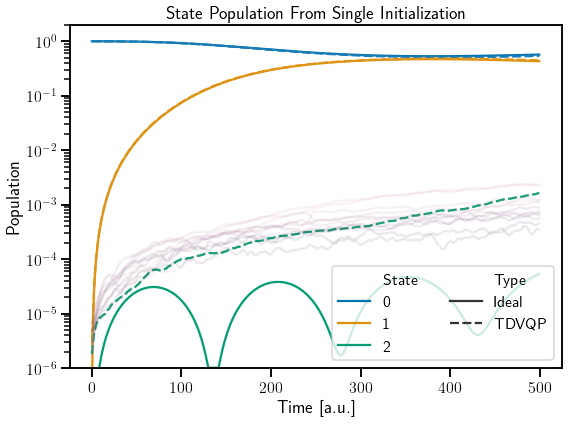

In [2]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df_coef1.query('State<3 & Population>1e-6&Type!="Exact"'),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=df_coef1.query('State<16 & Population>1e-6 &Type=="TDVQP"'),x='Time',y='Population',hue='State',style='Type',ci=None,ax=ax,legend=None,alpha=0.1)
plt.xlabel(r'Time [a.u.]')
plt.ylim([1e-6,2])
plt.yscale('log')
plt.title(r'State Population From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=2)
plt.tight_layout()

# Figure 4

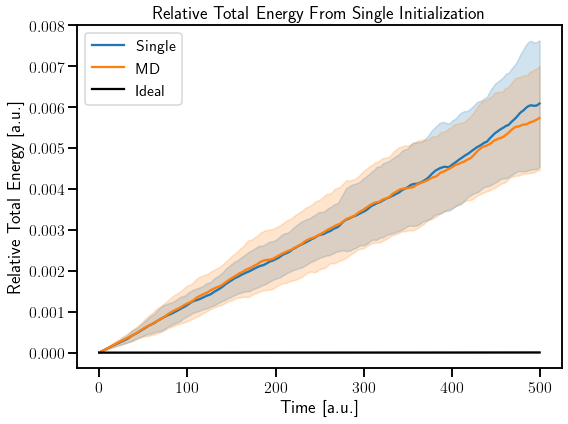

In [3]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df1, x="times", y="QC_energy_rel", ci='sd', ax=ax, palette="Set2",label=f'Single')
sns.lineplot(data=df2, x="times", y="QC_energy_rel", ci='sd', ax=ax, palette="Set2",label=f'MD')
sns.lineplot(data=df1, x="times", y="ideal_energy_rel", ci='sd', ax=ax,label='Ideal',color='black')
plt.ylabel(r'Relative Total Energy [a.u.]')
plt.xlabel(r'Time [a.u.]')
plt.title(r'Relative Total Energy From Single Initialization')
plt.tight_layout()


# S6

In [4]:
df1['times_scaled'] = df1['times']*2 #so that base unit in a.u. is 1
df2['times_scaled'] = df2['times']*20 #scaling manually due to timestep difference

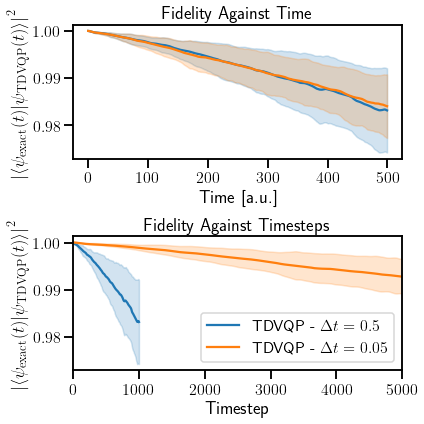

In [5]:
fig, ax = plt.subplots(nrows=2,figsize=((6, 6)))

sns.lineplot(data=df1, x="times", y="fidelity_to_exact", ci='sd', ax=ax[0], palette="Set2")
sns.lineplot(data=df2, x="times", y="fidelity_to_exact", ci='sd', ax=ax[0], palette="Set2")
ax[0].set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax[0].set_title('Fidelity Against Time')


sns.lineplot(data=df1, x="times_scaled", y="fidelity_to_exact", ci='sd', ax=ax[1], palette="Set2",label=f'TDVQP - $\Delta t=0.5$')
sns.lineplot(data=df2, x="times_scaled", y="fidelity_to_exact", ci='sd', ax=ax[1], palette="Set2",label=f'TDVQP - $\Delta t=0.05$')
ax[1].set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Timestep',xlim=[0,5000])
ax[1].set_title('Fidelity Against Timesteps')
plt.tight_layout()